1. Створіть функцію, яка приймає назву файлу та назву стовпця як параметр та повертає масив питру зі значеннями стовпця.

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def get_column_data(filename, column_name):
    with open(filename, mode='r', encoding='utf-8') as file:
        reader = csv.reader(file)
        headers = next(reader)  
        column_index = headers.index(column_name)  
        column_data = [float(row[column_index]) for row in reader if row[column_index].replace('.', '', 1).isdigit()]  
    return np.array(column_data)    # Повертаємо масив типу float

2. Використовуючи функцію з попереднього завдання, створіть масив питру зі значень стовпця «APC» (Armored personnel carrier).

In [2]:
def get_apc_data(file_name):
    return get_column_data(file_name, "APC")

3. Знайдіть добові втрати БТР.

In [3]:
def daily_losses(apc_data):
    return np.diff(apc_data, prepend=0)
    

4. Знайдіть 5 найбільших добових втрат БТР.

In [4]:
def top_5_losses(daily_losses):
    return np.sort(daily_losses)[-5:][::-1]

5. Визначте, скільки БТР було знищено влітку 2023 року.

In [5]:
def summer_2023_losses(file_name, apc_data):
    with open(file_name, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader)  # Пропустити заголовок
        dates = [row[0] for row in reader]
    dates = np.array([datetime.strptime(date, '%Y-%m-%d') for date in dates])
    summer_mask = (dates >= datetime(2023, 6, 1)) & (dates <= datetime(2023, 8, 31))
    return np.sum(daily_losses(apc_data)[summer_mask])

6. Знайдіть середнє значення знищених БТР за 100-500 днів війни.

In [6]:
def average_losses_between_days(apc_data, start_day=100, end_day=500):
    return np.mean(daily_losses(apc_data)[start_day:end_day])

7. Створіть графік втрат БТР за останні 200 днів (починаючи з останньої дати в наборі даних)

In [7]:
def plot_last_200_days(file_name, apc_data):
    with open(file_name, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader)  # Пропустити заголовок
        dates = [row[0] for row in reader]
    dates = np.array([datetime.strptime(date, '%Y-%m-%d') for date in dates])
    last_200_days = -200

    plt.figure(figsize=(16, 8), dpi=100)
    plt.plot(dates[last_200_days:], apc_data[last_200_days:], linestyle='--', color='blue', label='Втрати БТР')
    plt.grid(color='gray', linestyle=':', linewidth=0.5)
    plt.title('Втрати БТР за останні 200 днів', fontsize=14)
    plt.xlabel('Дата', fontsize=12)
    plt.ylabel('Втрати БТР', fontsize=12)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('apc_losses_last_200_days.png')
    plt.show()

Виклики функцій

[19369. 19355. 19339. ...   706.   706.   516.]
Добові втрати БТР: [ 1.9369e+04 -1.4000e+01 -1.6000e+01 ... -1.1000e+02  0.0000e+00
 -1.9000e+02]
5 найбільших втрат БТР: [1.9369e+04 1.4000e+01 0.0000e+00 0.0000e+00 0.0000e+00]
Втрати влітку 2023 року: -1135.0
Середні втрати за 100-500 днів: -21.35


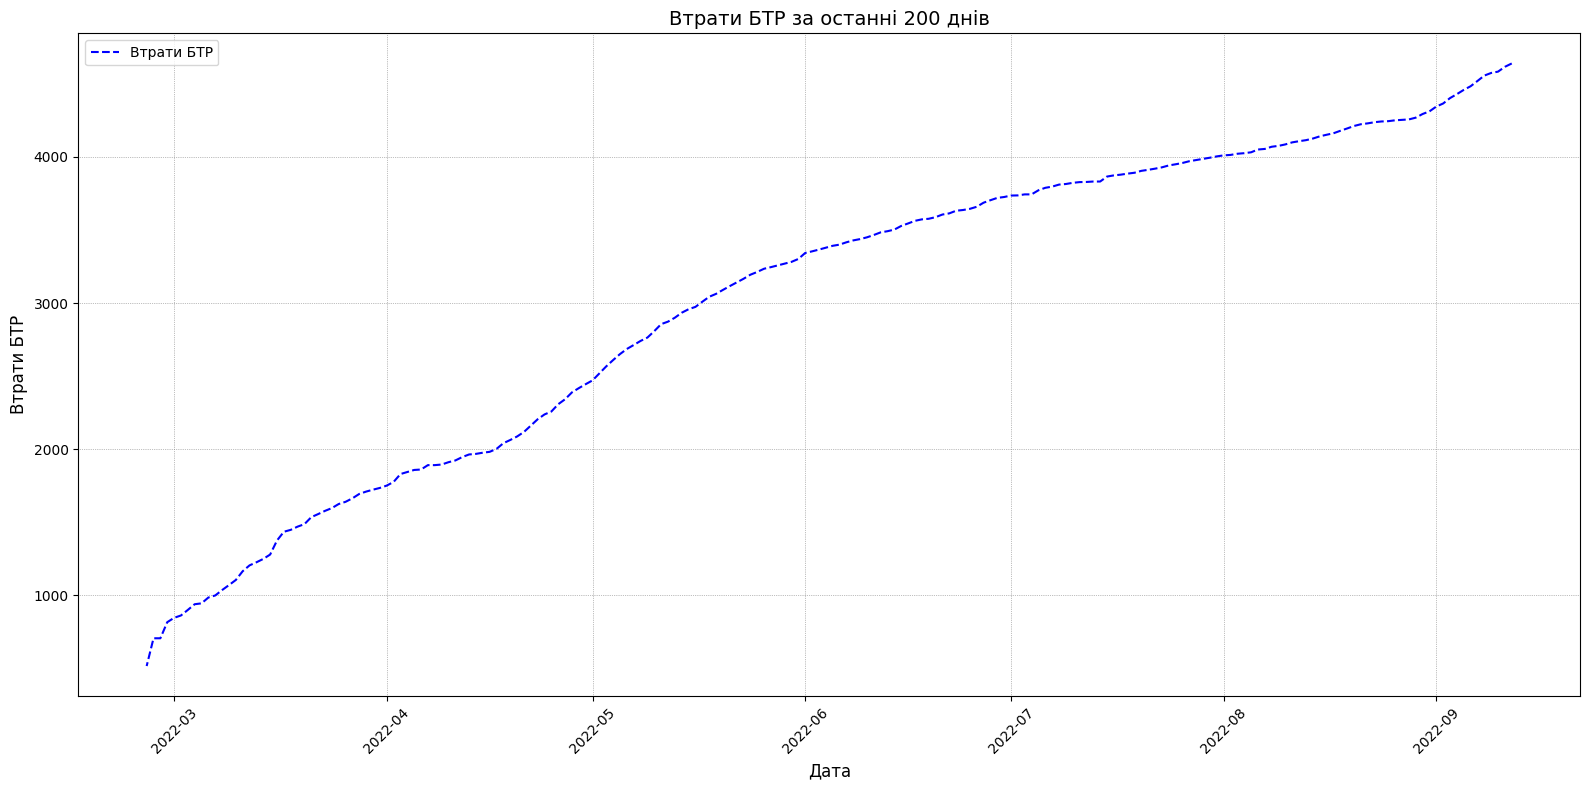

In [8]:
file_name = "russia_losses_equipment.csv"
apc_data = get_apc_data(file_name)

print(apc_data)
print("Добові втрати БТР:", daily_losses(apc_data))
print("5 найбільших втрат БТР:", top_5_losses(daily_losses(apc_data)))
print("Втрати влітку 2023 року:", summer_2023_losses(file_name, apc_data))
print("Середні втрати за 100-500 днів:", average_losses_between_days(apc_data))
plot_last_200_days(file_name, apc_data)